# Exploring Electronic Health Records

I am exploring the Synthea dataset and looking for interesting relations.

In [1]:
# Import all required dependencies
from datetime import timedelta
import json
import pathlib

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd


In [2]:
# Resolve the path to all the CSV files, so that we can load them easily
data_folder = pathlib.Path(".") / "../synthea_sample_data_csv_apr2020/csv"
data_folder = data_folder.resolve()


In [3]:
# Iterate through all CSVs and load them
csvs = data_folder.glob("*.csv")
csv_dataframes: dict[str, pd.DataFrame] = {}

for csv_path in csvs:
    dataframe = pd.read_csv(csv_path, encoding="utf-8")
    csv_filename = csv_path.name
    dataframe_name = csv_filename.split(".csv", maxsplit=1)[0]
    csv_dataframes[dataframe_name] = dataframe


In [4]:
# Extract dataframes we will be using
patients = csv_dataframes["patients"]
allergies = csv_dataframes["allergies"]
medications = csv_dataframes["medications"]
careplans = csv_dataframes["careplans"]
conditions = csv_dataframes["conditions"]
observations = csv_dataframes["observations"]
procedures = csv_dataframes["procedures"]
encounters = csv_dataframes["encounters"]
immunizations = csv_dataframes["immunizations"]
imaging_studies = csv_dataframes["imaging_studies"]

## Task 1
**Explore the data and make a visualization of a single patient trajectory as she transitions through the medical care system over time**


Task 1 gives an overview of a patient transitions in healthcare system during his/her life time.

We focus on the dataset `medications`, `careplans`, `encounters` and `conditions`.

These four datasets include the time period within their records, allowing us to see changes over time. 

The `ENCOUNTER` in each row are unique between datasets; in addition to the ones presented, there are others we didn't visualize in our trajectories such as procedures.

In [5]:
# Randomly select the demographic data of a single patient.
patient_demographic_data = patients.sample(n=1)
patient_demographic_data


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
254,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,1962-07-25,NaN,999-19-6194,S99976787,X36793377X,Mrs.,Libbie63,Gaylord332,NaN,...,Rehoboth Massachusetts US,686 Shields Dam,Easthampton,Massachusetts,Hampshire County,NaN,42.229781,-72.65363,1180529.87,5080.28


In [6]:
# Extract the patient ID in order to fetch the relevant data in other datasets.
patient_id = patient_demographic_data.Id.values[0]


In [7]:
# Show patient allergies, if any
patient_allergies = allergies[allergies.PATIENT == patient_id]
patient_allergies


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION


In [8]:
# Shows the number of allergic patients.
allergies.PATIENT.value_counts()


PATIENT
1c2aa038-9366-4c7d-9a3e-52cb753a670f    10
bf35e4fa-ea4f-40a4-8fe6-1f2f26e0aa45    10
2174522f-1d23-47cf-b56c-4ce3193c5bab    10
e112cedd-a98e-489e-abb0-875420d40397    10
b37c9b35-6fea-4570-b7f6-379baf4c9399     9
                                        ..
a0a64d10-5b1e-4e17-953a-efccb0c860da     1
c4f221f2-611b-4cdd-a0b6-958bbbfcf346     1
a0fa2ed6-1b9a-4e35-9126-7d8a5c891f42     1
eafd1fd3-3778-423a-ba79-4584bd310eb4     1
13b9a676-7cfd-4b7c-bdb6-43ec52b7c919     1
Name: count, Length: 141, dtype: int64

In the allergies dataset, there are 141 patients with at least 1 allergy.

The higest allergies counts types are 10 allergies per single patient.

The table includes a column "STOP" which is all empty; it makes sense as allergies are permanent.

In [9]:
# Get the patient's encounters records
patient_encounters = encounters[encounters.PATIENT == patient_id]
patient_encounters.head(3)


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
9747,67ed4b41-9672-4198-a138-ae1758189098,1999-10-14T00:58:58Z,1999-10-14T01:23:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,129.16,129.16,0.00,NaN,NaN
9748,0325bfa6-0aff-4af7-8c40-dc67063c9b2a,2010-07-01T00:58:58Z,2010-07-01T01:27:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,129.16,129.16,0.00,NaN,NaN
9749,0afd996a-8e07-44f1-b153-860351ff4732,2010-08-19T00:58:58Z,2010-08-19T01:28:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,dce6ce7f-7e6e-3035-aaad-46379b6d0bf0,dbddb5a1-2619-35c1-9824-3082d1e999a5,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN


In [10]:
# Get the patient's medication records
patient_medications = medications[medications.PATIENT == patient_id]
patient_medications.head(3)


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
6924,2015-12-29T00:58:58Z,2016-01-05T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,d47b3510-2895-3b70-9897-342d681c769d,f573cd24-4bfb-4dd1-94a8-6a80540be451,562251,Amoxicillin 250 MG / Clavulanate 125 MG Oral T...,79.47,0.0,1,79.47,444814009.0,Viral sinusitis (disorder)


In [11]:
# Get the patient's careplan records
patient_careplans = careplans[careplans.PATIENT == patient_id]
patient_careplans.head(3)


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION


In [12]:
# Get the patient's conditions records
patient_conditions = conditions[conditions.PATIENT == patient_id]
patient_conditions.head(3)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
1670,1999-10-13,NaN,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,67ed4b41-9672-4198-a138-ae1758189098,162864005,Body mass index 30+ - obesity (finding)
1671,2015-12-28,2016-01-04,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,f573cd24-4bfb-4dd1-94a8-6a80540be451,444814009,Viral sinusitis (disorder)
1672,2016-01-07,2016-01-14,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,937daeda-e5c8-4d78-ac8e-2998dbf955d1,195662009,Acute viral pharyngitis (disorder)


In [13]:
# Get the patient's observation records
patient_observations = observations[observations.PATIENT == patient_id]
patient_observations.head(3)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
54697,2010-08-19T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,0afd996a-8e07-44f1-b153-860351ff4732,8302-2,Body Height,162.5,cm,numeric
54698,2010-08-19T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,0afd996a-8e07-44f1-b153-860351ff4732,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,2.0,{score},numeric
54699,2010-08-19T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,0afd996a-8e07-44f1-b153-860351ff4732,29463-7,Body Weight,77.1,kg,numeric


In [14]:
# Get the patient's procedures records
patient_procedures = procedures[procedures.PATIENT == patient_id]
patient_procedures.head(3)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
6676,2010-07-01T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,0325bfa6-0aff-4af7-8c40-dc67063c9b2a,76601001,Intramuscular injection,3167.60,NaN,NaN
6677,2010-08-19T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,0afd996a-8e07-44f1-b153-860351ff4732,430193006,Medication Reconciliation (procedure),501.16,NaN,NaN
6678,2010-09-30T00:58:58Z,a7fe533e-f2b1-4fcd-90ec-6663ca7919e7,18ad6745-ef0b-4594-8a66-efddb1b2a2df,76601001,Intramuscular injection,2488.50,NaN,NaN


We define two functions for manipulating time data within the dataframes.

In [15]:
def calculate_row_period(row, start="START", stop="STOP"):
    """
    Generate interval data for a row.

    It works on both simple rows and when running .apply().

    The name of the start and stop column can be changed via the input variables.
    """
    # getattr(row, "START") == row.START

    start_time = pd.to_datetime(getattr(row, start)).date()
    end_time = pd.to_datetime(getattr(row, stop)).date()

    if pd.isnull(end_time):
        end_time = pd.to_datetime("today").date()

    return (start_time, end_time)


In [16]:
def calculate_row_days(row, start="START", stop="STOP"):
    """
    Returns the number of days for the related row.

    Normally the considered columns are "START" and "STOP"
    These can be changed via the input variables.
    """
    start_date, end_date = calculate_row_period(row, start, stop)
    return end_date - start_date


We can now start to work on calculating the health trajectory.

* An health trajectory shows the evolution of the patient condition within the health system over a certain period of time
* By using the birth and death dates in `patient` we cand define the start and end points for the X axis in the trajectory
* If a patient does not have a death date, we use `today` as the end date for the plot as we assume the person is still alive.


In [17]:
# Fetch the patient's trajectory X boundaries
birth, death = calculate_row_period(
    patient_demographic_data.iloc[0], "BIRTHDATE", "DEATHDATE"
)
print(birth, "-", death)


1962-07-25 - 2023-04-10


In [18]:
# Generate a dataframe with the index being the range of dates of the patient
X_axis = pd.date_range(birth, death)
patient_trajectory = X_axis.to_frame(name="Date")
patient_trajectory = patient_trajectory.set_index("Date")
patient_trajectory


""
Date
1962-07-25
1962-07-26
1962-07-27
1962-07-28
1962-07-29
...
2023-04-06
2023-04-07
2023-04-08


In [19]:
def generate_frequency_datapoints(values_dataframe: pd.DataFrame, column_name: str):
    """
    Extract frequency data from a dataframe and inject it into the patient trajectory dataframe
    in the appropriate column provided via `column_name`.
    """
    START = pd.to_datetime(values_dataframe.START).apply(lambda x: x.date())
    STOP = pd.to_datetime(values_dataframe.STOP).apply(
        lambda x: x.date() if pd.notnull(x) else death
    )

    # Generate empty dataframe with the X axis index
    patient_trajectory[column_name] = np.zeros(len(X_axis))

    for start, stop in zip(START, STOP):
        date_range = pd.date_range(start, stop)
        patient_trajectory.loc[date_range, column_name] += 1


In [20]:
# Get the patient frequency data
generate_frequency_datapoints(patient_encounters, "encounter")
generate_frequency_datapoints(patient_medications, "medicine")
generate_frequency_datapoints(patient_careplans, "careplan")
generate_frequency_datapoints(patient_conditions, "condition")


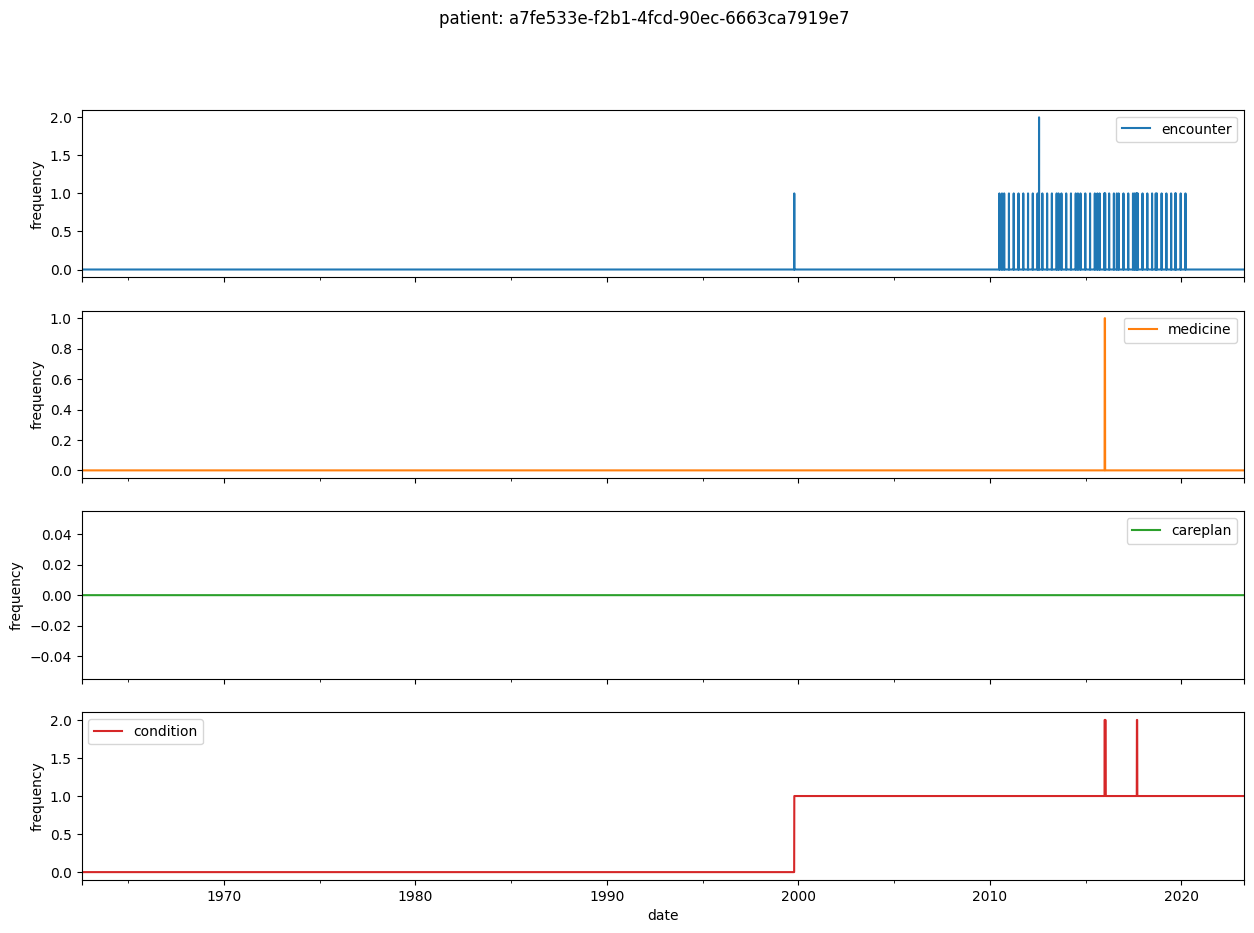

In [21]:
# Plot the current table data
life_time_axes = patient_trajectory.plot(
    xlabel="date",
    ylabel="frequency",
    style="-",
    title=f"patient: {patient_id}",
    subplots=True,
    figsize=(15, 10)
)

# Fetch the figure for saving later
life_time_figure = life_time_axes[0].get_figure()


In [22]:
# Save the life time plot as PNG

figures_directory = pathlib.Path(f"../figure").resolve()

patient_output_directory = figures_directory / "patient_trajectory" / f"{patient_id}"
patient_output_directory.mkdir(parents=True, exist_ok=True)

life_time_figure.savefig(
    patient_output_directory / "life_time.png"
)

In [23]:
# Define good start and end points for the plot.
# First, find all cells that have at least a value that is non zero
not_null_trajectory = patient_trajectory.loc[~(patient_trajectory == 0).all(axis=1)]

# Get the first and last non-zero dates
not_null_index = not_null_trajectory.index
not_null_start = not_null_index[0]
not_null_end = not_null_index[-1]

# Add a little padding on both sides
plot_start = not_null_start - timedelta(days=365)
if plot_start < patient_trajectory.index[0]:
    plot_start = patient_trajectory.index[0]

plot_end = not_null_end + timedelta(days=365)
if plot_end > patient_trajectory.index[-1]:
    plot_end = patient_trajectory.index[-1]

# Generate the appropriate time index for .loc
plot_range = pd.date_range(plot_start, plot_end)


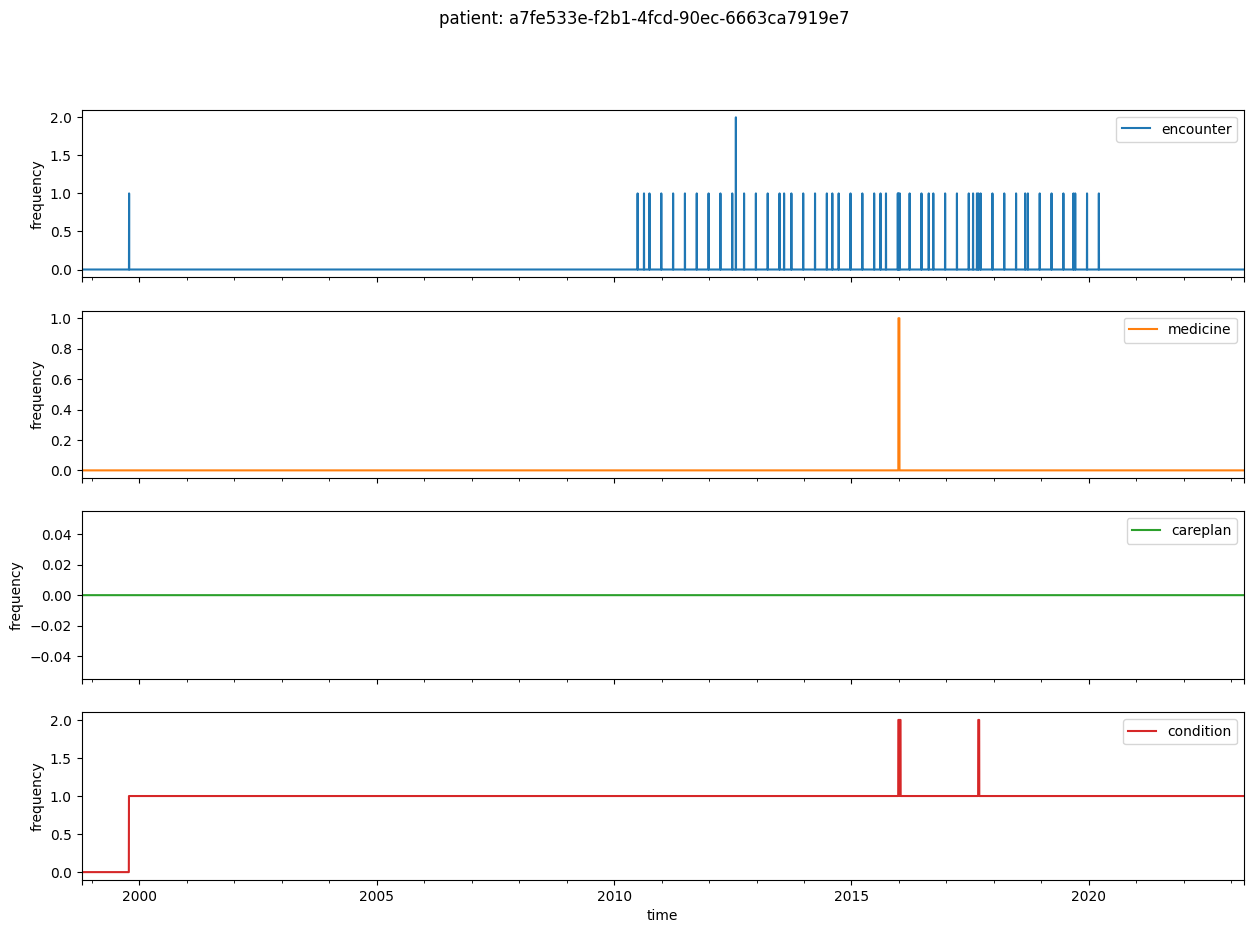

In [24]:
# Plot the data with better focused time period
focused_axes = patient_trajectory.loc[plot_range].plot(
    figsize=(15, 10),
    xlabel="time",
    ylabel="frequency",
    style="-",
    title=f"patient: {patient_id}",
    subplots=True,
)

focused_figure = focused_axes[0].get_figure()


In [25]:
# Save also the focused figure
focused_figure.savefig(patient_output_directory / "focus.png")

In [26]:
# Generate and save the patient demographic data as JSON

patient_json_string = patient_demographic_data[
    ["Id", "BIRTHDATE", "RACE", "ETHNICITY", "GENDER", "MARITAL"]
].to_json(orient="records")

patient_json_data = json.loads(patient_json_string)[0]

# Add the age
patient_json_data["AGE"] = round((death - birth) / timedelta(days=365))

# Store the JSON data in the appropriate file
patient_json_file = patient_output_directory / "demographic.json"

with patient_json_file.open("w") as file_writer:
    json.dump(patient_json_data, file_writer, indent=4)

# See the data also in the notebook
print(json.dumps(patient_json_data, indent=2))


{
  "Id": "a7fe533e-f2b1-4fcd-90ec-6663ca7919e7",
  "BIRTHDATE": "1962-07-25",
  "RACE": "white",
  "ETHNICITY": "nonhispanic",
  "GENDER": "F",
  "MARITAL": "M",
  "AGE": 61
}


# Task 2
Explore the data to find and present patterns of patients with the same conditions such as:

##### 2.1. Which are the three most common conditions (present graphs and numbers)?


For Task 2, I was asked to investigate further the dataset.

As I liked the suggested questions, I decided to try to answer them. 

Task 2.1. asks to identify the 3 most common conditions.

I discovered there are a few patients with many condition records, so I did some additional investigation in later tasks, for example in task 2.3 verifying whether a condition (disorder) is recurrent.

The 3 most common conditions are, with their number of cases:
1. Viral sinusitis, 1248 cases
2. Acute viral pharyngitis, 653 cases
3. Acute bronchitis, 563 cases


In [27]:
# Show the conditions dataframe for easier analysis
conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2001-05-01,NaN,1d604da9-9a81-4ba9-80c2-de3375d59b40,8f104aa7-4ca9-4473-885a-bba2437df588,40055000,Chronic sinusitis (disorder)
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)


In [28]:
# Get the counts of each condition
simple_condition_counts = conditions.DESCRIPTION.value_counts().to_frame()

# Some patients experience the same condition multiple times and we should consider it.
# First identify the combinations of patients related to conditions
pair_counts = conditions[["DESCRIPTION", "PATIENT"]].value_counts().to_frame()
pair_counts = pair_counts.reset_index()
# Then calculate the unique patients for each condition
unique_patient_condition_counts = pair_counts["DESCRIPTION"].value_counts().to_frame()

# Finally, merge them in a single dataframe for easier visualization
final_condition_counts = pd.merge(
    simple_condition_counts,
    unique_patient_condition_counts,
    on=["DESCRIPTION"],
    suffixes=["_byCase", "_byPatient"],
)
final_condition_counts.rename(
    columns={
        "count_byCase": "Unique cases",
        "count_byPatient": "Unique patients",
    },
    inplace=True
)

final_condition_counts.head(10)


,Unique cases,Unique patients
DESCRIPTION,,
Viral sinusitis (disorder),1248,743
Acute viral pharyngitis (disorder),653,492
Acute bronchitis (disorder),563,464
Normal pregnancy,516,205
Body mass index 30+ - obesity (finding),449,449
Prediabetes,317,317
Hypertension,302,302
Anemia (disorder),300,300
Chronic sinusitis (disorder),236,233


In [29]:
# Show basic analysis metrics for the columns
final_condition_counts.describe()


,Unique cases,Unique patients
count,129.000000,129.000000
mean,64.930233,55.542636
std,148.877529,105.899422
min,1.000000,1.000000
25%,8.000000,8.000000
50%,22.000000,22.000000
75%,50.000000,50.000000
max,1248.000000,743.000000


In [30]:
# Small helper function for adding the value count in a bar plot.
def add_values_to_bar_plot(figure: Axes):
    """Add the relevant values annotation in a bar plot."""
    for patch in figure.patches:
        figure.annotate(
            str(patch.get_height()),
            (patch.get_x() * 1.005, patch.get_height() * 1.005)
        )

,Unique cases,Unique patients
DESCRIPTION,,
Viral sinusitis (disorder),1248,743
Acute viral pharyngitis (disorder),653,492
Acute bronchitis (disorder),563,464


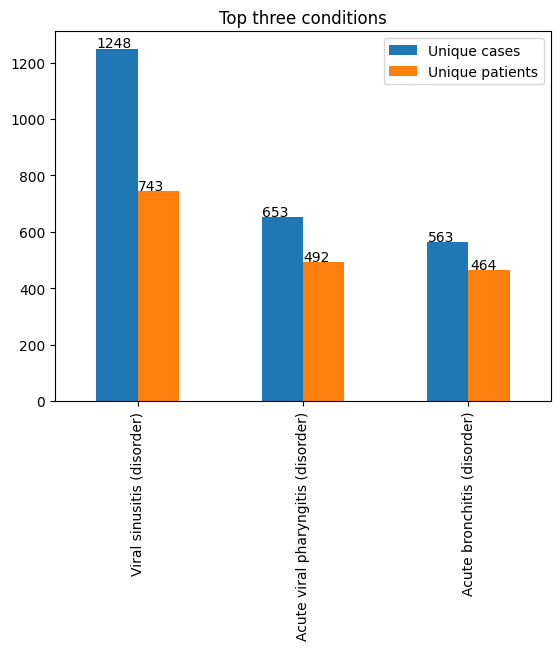

In [31]:
# Plot the three conditions and store them as per request.

top_three_conditions = final_condition_counts.head(3)
top_three_conditions_figure = top_three_conditions.plot(
    kind="bar",
    title="Top three conditions",
    xlabel=""
)
add_values_to_bar_plot(top_three_conditions_figure)
top_three_conditions

In [32]:
# Save the plot figure appropriately
top_three_conditions_figure.get_figure().savefig(
    figures_directory / "Top Three.png",
    bbox_inches="tight"
)

In [33]:
# Fetch all the identified conditions matching the top three symptoms
common_conditions = conditions[conditions["DESCRIPTION"].isin(top_three_conditions.index)]
common_conditions

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
1,2011-08-09,2011-08-16,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,9d35ec9f-352a-4629-92ef-38eae38437e7,444814009,Viral sinusitis (disorder)
2,2011-11-16,2011-11-26,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd,195662009,Acute viral pharyngitis (disorder)
3,2011-05-13,2011-05-27,10339b10-3cd1-4ac3-ac13-ec26728cb592,e1ab4933-07a1-49f0-b4bd-05500919061d,10509002,Acute bronchitis (disorder)
4,2011-02-06,2011-02-14,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,195662009,Acute viral pharyngitis (disorder)
5,2011-04-18,2011-04-28,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,195662009,Acute viral pharyngitis (disorder)
...,...,...,...,...,...,...
8346,2016-07-01,2016-07-15,1fc8dafd-90e5-44d6-9179-81156c0ea083,a66e5487-0715-4b10-925d-4542ac1423d7,444814009,Viral sinusitis (disorder)
8355,1998-08-19,1998-09-02,6d048a56-edb8-4f29-891d-7a84d75a8e78,11a987a1-f262-450c-96b5-8ba2351a2f2e,444814009,Viral sinusitis (disorder)
8356,2002-04-15,2002-04-29,6d048a56-edb8-4f29-891d-7a84d75a8e78,7887e57a-dce6-48a1-9aac-bae2a809c77f,10509002,Acute bronchitis (disorder)
8374,2010-11-18,2010-11-25,fc817953-cc8b-45db-9c85-7c0ced8fa90d,8aabb13d-f4ac-4037-95ab-00e0e48a1b34,444814009,Viral sinusitis (disorder)


In [34]:
# Double-check
# 1. We fetched the proper conditions
# 2. The numbers match the search we did above
# 3. Code and description are unique e.g. no same description for multiple codes
common_conditions[["CODE", "DESCRIPTION"]].value_counts()

CODE       DESCRIPTION                       
444814009  Viral sinusitis (disorder)            1248
195662009  Acute viral pharyngitis (disorder)     653
10509002   Acute bronchitis (disorder)            563
Name: count, dtype: int64

##### 2.2. Are there similarities in how the three conditions are treated? Showcase examples.


Task 2.2 focus is on the similarity between the most common conditions.

We could identify some patterns, for example:

* Acute bronchitis (disorder)
  The following records have high count number and are not shared with the other conditions:
  - medication: Acetaminophen (this medication is only used for this condition)
  - careplan: Respiratory therapy
  - procedure: Measurement of respiratory function, Sputum examination 
* Acute viral pharyngitis (disorder) 
  - medication: there is no major medication specifically used for this condition.
  - procedure: Throat culture 
  - careplans: no care plan was identified
* Viral sinusitis (disorder):
  - medication: Amoxicillin 250 MG / Clavulanate 125 MG Oral Tablet
  - careplan: only a single case of "Urinary tract infection" care plan
  - procedure: Medication Reconciliation

There is no clear indication that the 3 conditions are related given their medical records.

In [35]:
# Prepare relevant dataframes copies so that we can manipulate them later.
treatment_plans = {
    "medications": medications.copy(),
    "procedures": procedures.copy(),
    "careplans": careplans.copy(),
    "observations": observations.copy(),
    "immunizations": immunizations.copy(),
    # Would have liked to check imaging studies but there is no record for the top three conditions
    # "imaging_studies": imaging_studies.copy(),
}

# Make PATIENT and ENCOUNTER primary keys for each needed table.
index_keys = ["PATIENT", "ENCOUNTER"]
for table in treatment_plans.values():
    table.set_index(index_keys, inplace=True)


In [36]:
# Generate count tables for inspecting data similarities
count_tables = {}

# Index properly the common condition dataframe for merging later
indexed_common_conditions = common_conditions.set_index(index_keys)

for treatment_key in treatment_plans:
    # Get the dataframe we want to combine with the common conditions
    treatment_plan = treatment_plans[treatment_key]

    # Filter for matchint the relevant medicatiosn
    plan_filter = treatment_plan.index.isin(indexed_common_conditions.index)

    # Get the relevant medications
    filtered_plan = treatment_plan.loc[plan_filter]

    # Get only the columns we want
    filtered_plan = filtered_plan[["CODE", "DESCRIPTION"]]

    # Prepare the suffix
    treatment_suffix = f"_{treatment_key.upper()}"

    # Merge the conditions and the treatment data 
    combined_data = pd.merge(
        indexed_common_conditions,
        filtered_plan,
        left_index=True,
        right_index=True,
        how="left",
        suffixes=("_CONDITION", treatment_suffix)
    )

    # Reset the index, so that we can group by what we want
    combined_data.reset_index(inplace=True)

    # Get only the data we want
    treatment_column = f"DESCRIPTION{treatment_suffix}"
    combined_data_count = combined_data[["DESCRIPTION_CONDITION", treatment_column]]

    # Group by the treatment key and the condition, then consider their count as measurement
    combined_data_count = (
        combined_data_count
        .groupby(["DESCRIPTION_CONDITION", treatment_column])
        .size()
        .to_frame("COUNT") 
    )

    # Store in the dictionary for access later
    count_tables[treatment_key] = combined_data_count


In [37]:
# Verify the generated dataframes
count_tables.keys()

dict_keys(['medications', 'procedures', 'careplans', 'observations', 'immunizations'])

In [38]:
# Visualize the medication counts
count_tables["medications"]

COUNT
DESCRIPTION_CONDITION              DESCRIPTION_MEDICATIONS                                  
Acute bronchitis (disorder)        120 ACTUAT Fluticasone propionate 0.044 MG/ACTU...      2
                                   24 HR Metformin hydrochloride 500 MG Extended R...      1
                                   60 ACTUAT Fluticasone propionate 0.25 MG/ACTUAT...      1
                                   Acetaminophen 21.7 MG/ML / Dextromethorphan Hyd...    126
                                   Acetaminophen 325 MG Oral Tablet                      434
                                   Amlodipine 5 MG Oral Tablet                             1
                                   Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet       7
                                   Clopidogrel 75 MG Oral Tablet                           1
                                   Diazepam 5 MG Oral Tablet                               1
                                   Digoxin 0.125 MG Oral Tablet                            5
                                   Errin 28 Day Pack                                       1
                                   Hydrochlorothiazide 25 MG Oral Tablet                   6
                                   NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT M...      2
                                   Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray               3
                                   Simvastatin 20 MG Oral Tablet                           1
                                   Verapamil Hydrochloride 40 MG                           5
                                   Warfarin Sodium 5 MG Oral Tablet                        5
                                   amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG /...      3
                                   insulin human  isophane 70 UNT/ML / Regular Ins...      4
Acute viral pharyngitis (disorder) 120 ACTUAT Fluticasone propionate 0.044 MG/ACTU...      3
                                   24 HR Metformin hydrochloride 500 MG Extended R...      1
                                   60 ACTUAT Fluticasone propionate 0.25 MG/ACTUAT...      1
                                   Amlodipine 5 MG Oral Tablet                             1
                                   Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet       3
                                   Clopidogrel 75 MG Oral Tablet                           1
                                   Digoxin 0.125 MG Oral Tablet                            1
                                   Hydrochlorothiazide 25 MG Oral Tablet                   4
                                   NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT M...      3
                                   Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray               3
                                   Penicillin V Potassium 250 MG Oral Tablet               9
                                   Simvastatin 20 MG Oral Tablet                           1
                                   Verapamil Hydrochloride 40 MG                           1
                                   Warfarin Sodium 5 MG Oral Tablet                        1
                                   amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG /...      1
                                   insulin human  isophane 70 UNT/ML / Regular Ins...      2
Viral sinusitis (disorder)         120 ACTUAT Fluticasone propionate 0.044 MG/ACTU...     20
                                   24 HR Metformin hydrochloride 500 MG Extended R...      8
                                   60 ACTUAT Fluticasone propionate 0.25 MG/ACTUAT...      6
                                   Amlodipine 5 MG Oral Tablet                             9
                                   Amoxicillin 250 MG / Clavulanate 125 MG Oral Ta...    247
                                   Atenolol 50 MG / Chlorthalidone 25 MG Oral Tablet      16
                                   Clopidogrel 75 MG Oral Tablet                        

In [39]:
# Visualize the careplans used for the conditions
count_tables["careplans"]

,,COUNT
DESCRIPTION_CONDITION,DESCRIPTION_CAREPLANS,
Acute bronchitis (disorder),Respiratory therapy,560
Viral sinusitis (disorder),Urinary tract infection care,1


In [40]:
# Visualize the procedures used for the conditions
count_tables["procedures"]

COUNT
DESCRIPTION_CONDITION              DESCRIPTION_PROCEDURES                                
Acute bronchitis (disorder)        Information gathering (procedure)                    1
                                   Measurement of respiratory function (procedure)    287
                                   Medication Reconciliation (procedure)               21
                                   Plain chest X-ray (procedure)                       39
                                   Sputum examination (procedure)                     111
Acute viral pharyngitis (disorder) Medication Reconciliation (procedure)               13
                                   Throat culture (procedure)                         241
Viral sinusitis (disorder)         Medication Reconciliation (procedure)               67
                                   Pulmonary rehabilitation (regime/therapy)            2
                                   Spirometry (procedure)                               5

In [41]:
# Visualize the observations related to the conditions
count_tables["observations"]

COUNT
DESCRIPTION_CONDITION       DESCRIPTION_OBSERVATIONS                                 
Acute bronchitis (disorder) Abuse Status [OMAHA]                                    1
                            Are you covered by health insurance or some oth...      1
                            Body Height                                            62
                            Body Mass Index                                        61
                            Body Weight                                            62
...                                                                               ...
Viral sinusitis (disorder)  Tobacco smoking status NHIS                           143
                            Total Cholesterol                                      19
                            Triglycerides                                          19
                            Urea Nitrogen                                          41
                            Weight-for-length Per age and sex                       9

[122 rows x 1 columns]

In [42]:
# Task 3
# my idea: we can also check by time that which is the 1st action for each condtion,
# or which is the most common action flow for each condition.

##### 2.3. What other common pattern characteristics can be found for the three groups of conditions?

Task 2.3 focuses identifying similarities between the three condition groups.

I specifically focused on the patients, in order to identify whether these conditions would affect people given some demographic condition.

I consider and evaluate patients by gender, repeated condition cases per patient, duration of condition cases, patients' city, patients' birthplace, and patient' counties.

I would have been interested in exploring records from different countries, however the generated dataset had only the US state of Massachusetts.

All three conditions are highly related to the city of Boston.
I am not familiar with the demographic data of the US, including the one of the state of Massachussets; my assumption is that this dataset follows the standard population distribution, meaning that as the capital of the state is the biggest city, it also has an higher number of records given its bigger population size.

Otherwise, the dataset would show that the city of Boston has some environmental problems which would cause these diseases to be occuring more frequently.



In [43]:
# Generate a dataframe per each top condition and store it for later usage
top_condition_dataframes = {
    condition_description: common_conditions[common_conditions["DESCRIPTION"] == condition_description]
    for condition_description in top_three_conditions.index
}

In [44]:
# Find the patients for each top condition
top_condition_patients = {}

for condition in top_three_conditions.index:
    # Get all patients IDs
    condition_patients = common_conditions[common_conditions["DESCRIPTION"] == condition]["PATIENT"]
    # Find all patients data
    patients_data = patients[patients["Id"].isin(condition_patients)]
    # Select only relevant data
    patients_data = patients_data[[
        'Id',
        'BIRTHDATE',
        'DEATHDATE',
        'MARITAL',
        'RACE',
        'ETHNICITY',
        'GENDER',
        'BIRTHPLACE',
        'CITY',
        'STATE',
        'COUNTY',
        'HEALTHCARE_EXPENSES',
        'HEALTHCARE_COVERAGE'
    ]]
    # Store data for later 
    top_condition_patients[condition] = patients_data

In [45]:
# Verify we properly generated the patients data
a_top_condition = top_three_conditions.index[0]
print("Patients for", a_top_condition)
top_condition_patients[a_top_condition].head()

Patients for Viral sinusitis (disorder)


,Id,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,M,white,hispanic,M,Marigot Saint Andrew Parish DM,Chicopee,Massachusetts,Hampden County,271227.08,1334.88
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,M,white,nonhispanic,M,Springfield Massachusetts US,Chicopee,Massachusetts,Hampden County,574111.90,2606.40
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,M,white,nonhispanic,F,Yarmouth Massachusetts US,Lowell,Massachusetts,Middlesex County,935630.30,8756.19
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,NaN,white,nonhispanic,M,Patras Achaea GR,Boston,Massachusetts,Suffolk County,598763.07,3772.20
10,ad2e9916-4979-40fc-a8c0-68651a0cb5a6,2004-12-19,NaN,NaN,white,nonhispanic,M,Plymouth Massachusetts US,Springfield,Massachusetts,Hampden County,317164.78,2816.48


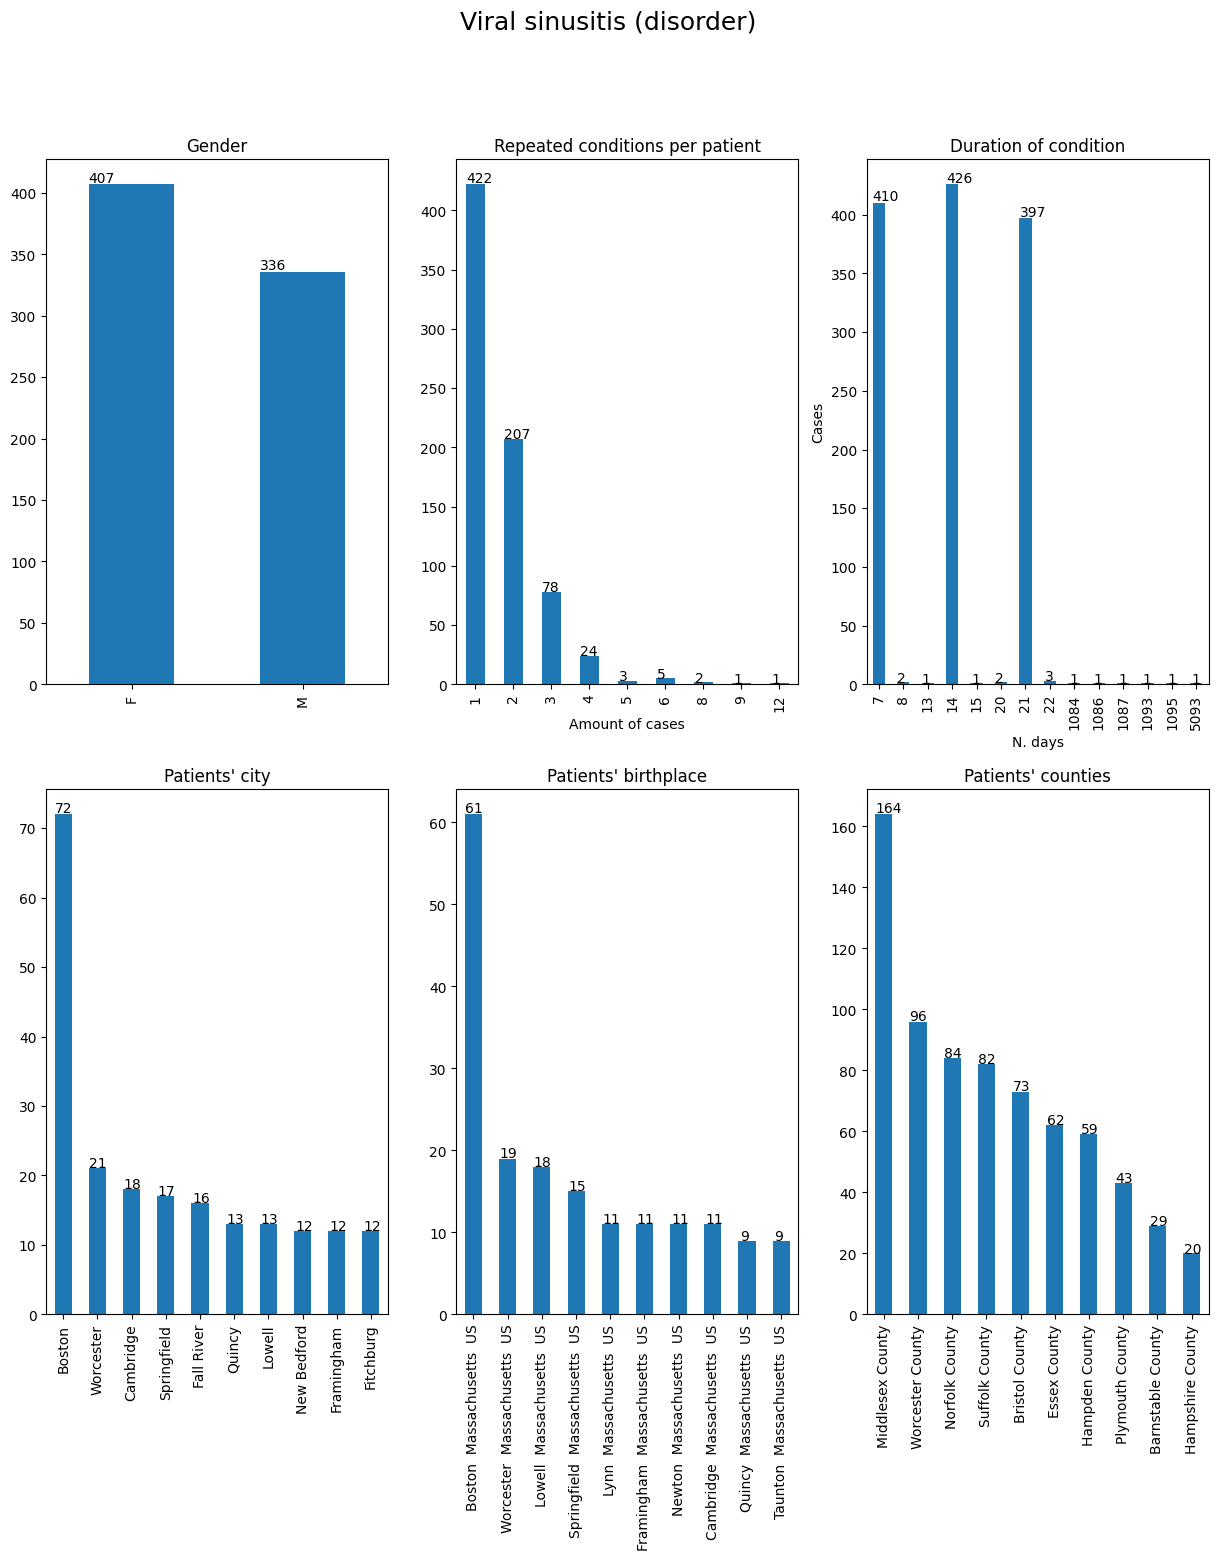

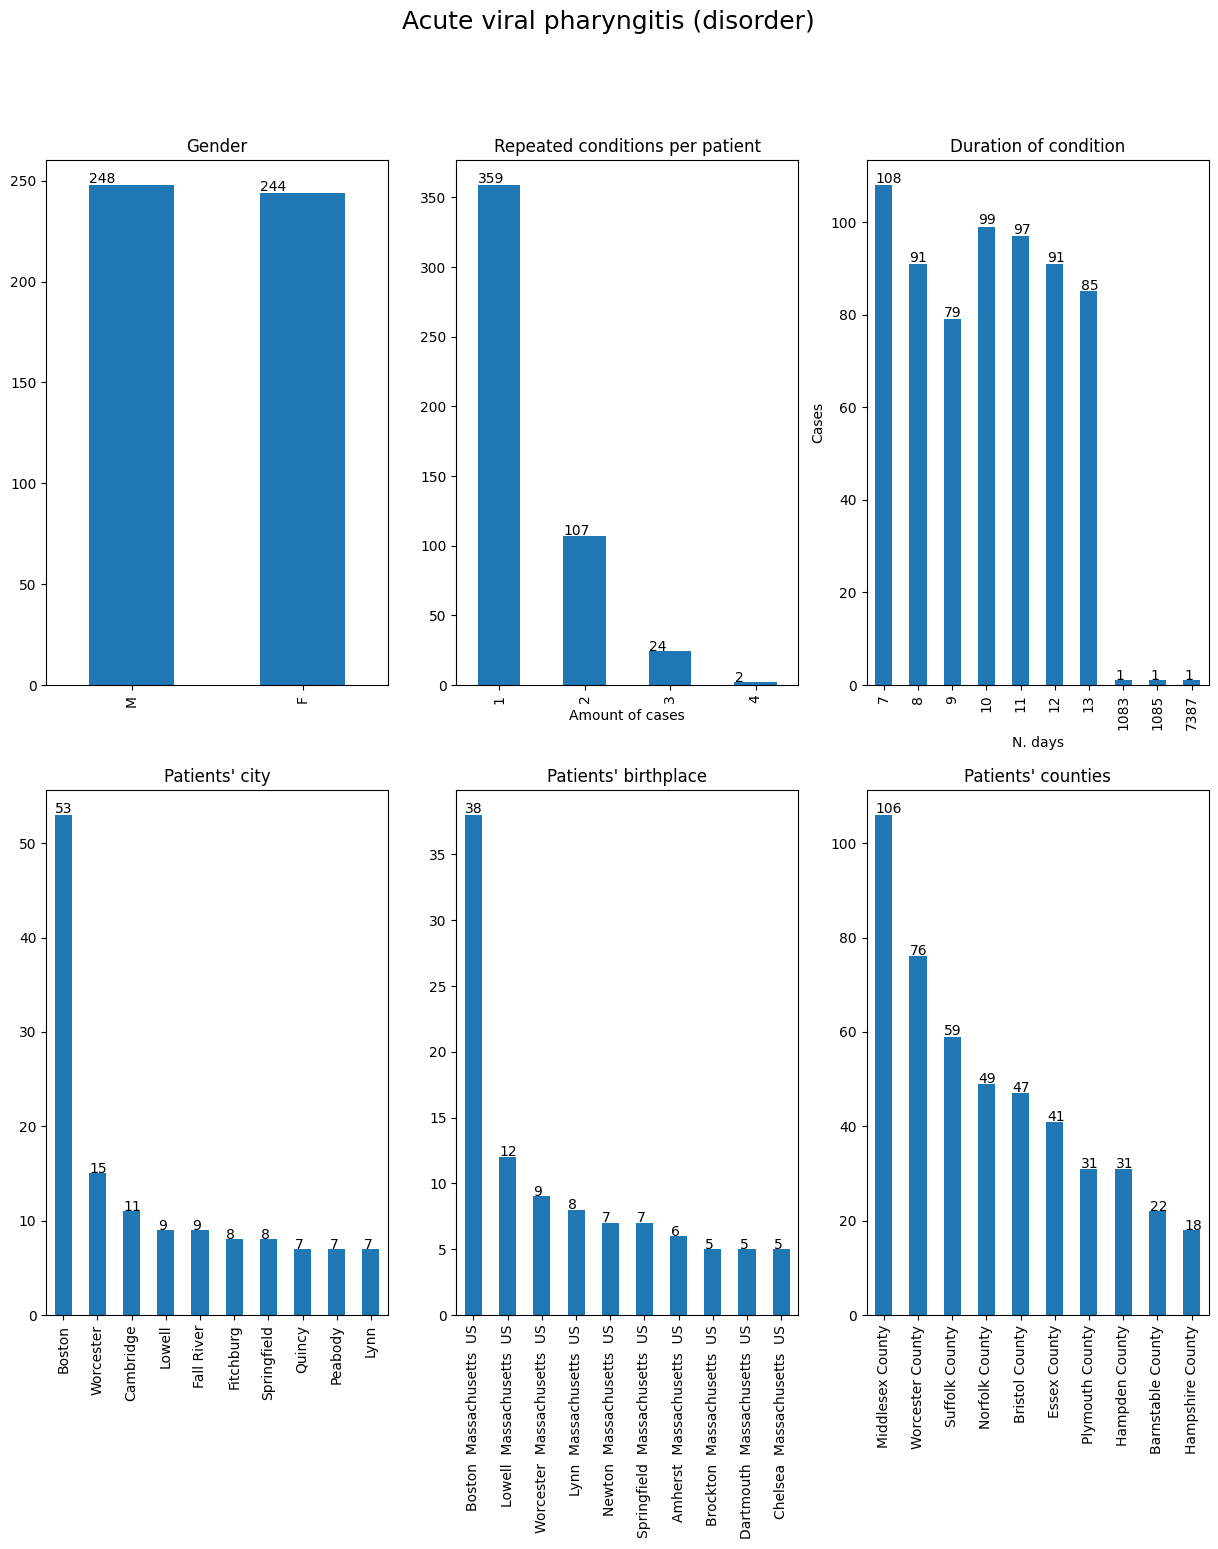

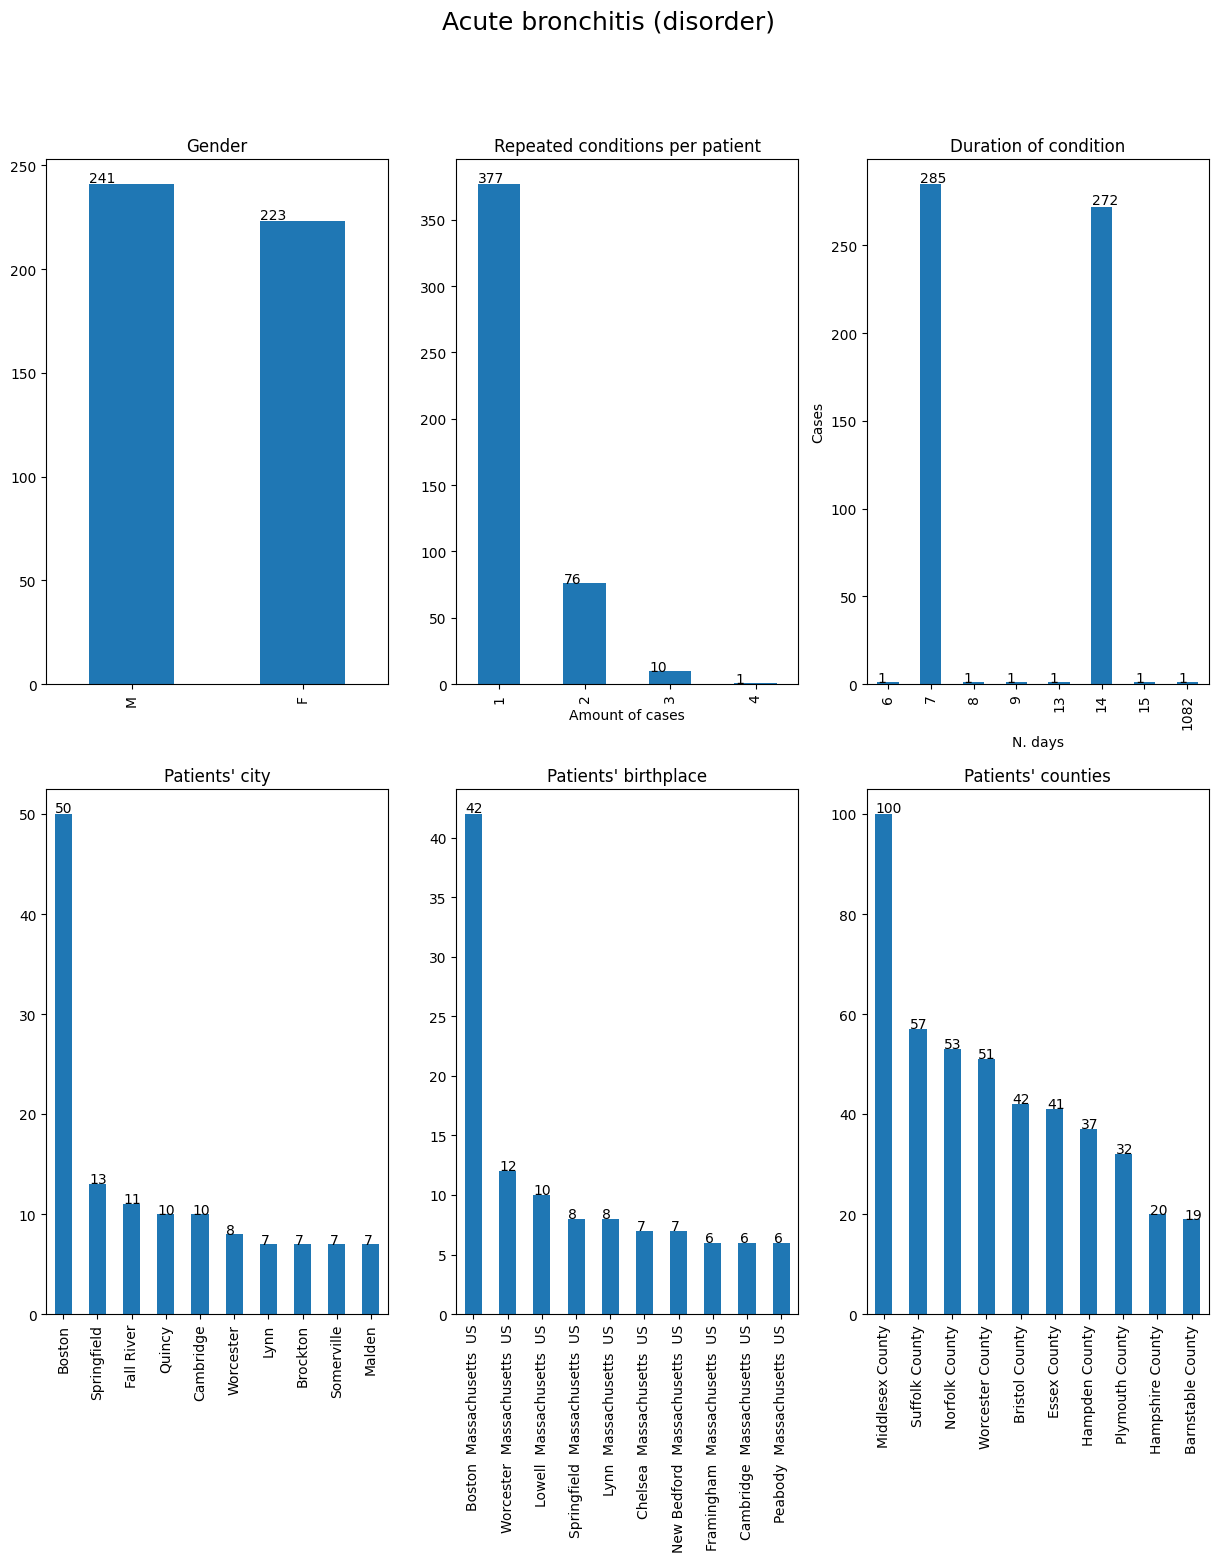

In [46]:
# Generate plots for evaluation and comparison of the top three conditions

for top_condition in top_three_conditions.index:
    # Get the correct dataframes
    condition_data: pd.DataFrame = top_condition_dataframes[top_condition]
    patients_data: pd.DataFrame = top_condition_patients[top_condition]

    # Create subplots, so that we can combine multiple plots in one picture
    plot_fig, ax = plt.subplots(2, 3)

    # Add the title for the plot
    plot_fig.suptitle(top_condition , fontsize=18)

    # Increase the size for better fit
    plot_fig.set_figwidth(15)
    plot_fig.set_figheight(15)

    # 1. Show gender information
    patient_genders: pd.Series = patients_data["GENDER"].value_counts()
    plot_sub = patient_genders.plot.bar(title="Gender", xlabel="", ax=ax[0, 0])
    add_values_to_bar_plot(plot_sub)

    # 2. Show patient cities
    patient_cities: pd.Series = patients_data["CITY"].value_counts()
    plot_sub = patient_cities.head(10).plot.bar(title="Patients' city", xlabel="", ax=ax[1, 0])
    add_values_to_bar_plot(plot_sub)

    # 3. Show patient brithplace
    patient_counties: pd.Series = patients_data["BIRTHPLACE"].value_counts()
    plot_sub = patient_counties.head(10).plot.bar(title="Patients' birthplace", xlabel="", ax=ax[1,1])
    add_values_to_bar_plot(plot_sub)

    # 4. Show patient counties
    patient_counties: pd.Series = patients_data["COUNTY"].value_counts()
    plot_sub = patient_counties.head(10).plot.bar(title="Patients' counties", xlabel="", ax=ax[1,2])
    add_values_to_bar_plot(plot_sub)

    # 5. See how many tunes the patients had the same condition
    cases_per_patient = condition_data.PATIENT.value_counts()
    cases_counts_for_patients = cases_per_patient.value_counts()
    cases_counts_for_patients_df = cases_counts_for_patients.to_frame("patients").sort_index()
    plot_sub = cases_counts_for_patients_df.plot(
        kind="bar",
        title="Repeated conditions per patient",
        xlabel="Amount of cases",
        ax=ax[0,1],
        legend=False,
    )
    add_values_to_bar_plot(plot_sub)

    # 6. Condition duration 
    condition_days = condition_data.apply(calculate_row_days, axis=1)
    condition_days = condition_days.apply(lambda x: x.days)
    condition_days = condition_days.value_counts().sort_index()

    plot_sub = condition_days.plot(kind='bar', title="Duration of condition", xlabel='N. days', ylabel='Cases', ax=ax[0,2])
    add_values_to_bar_plot(plot_sub)

    # Save the figure to the data folder
    plot_path = figures_directory / f"{top_condition}.png"
    plot_fig.savefig(plot_path)


In [47]:
# Verify the patiens cities
patients.CITY.value_counts()

CITY
Boston              116
Worcester            31
Cambridge            27
Springfield          23
Quincy               20
                   ... 
Great Barrington      1
Halifax               1
Rockland              1
Northampton           1
Millbury              1
Name: count, Length: 237, dtype: int64

       Viral sinusitis (disorder)  Acute viral pharyngitis (disorder)  Acute bronchitis (disorder)
count                7.430000e+02                        3.100000e+02                 2.980000e+02
mean                 8.109727e+05                        8.144625e+05                 7.779242e+05
std                  5.337573e+05                        5.457310e+05                 5.331787e+05
min                  4.641940e+03                        6.396740e+03                 5.772100e+03
25%                  2.879827e+05                        2.815180e+05                 2.686522e+05
50%                  8.153286e+05                        8.108094e+05                 7.242876e+05
75%                  1.301269e+06                        1.318322e+06                 1.269239e+06
max                  1.901642e+06                        1.901642e+06                 1.785889e+06


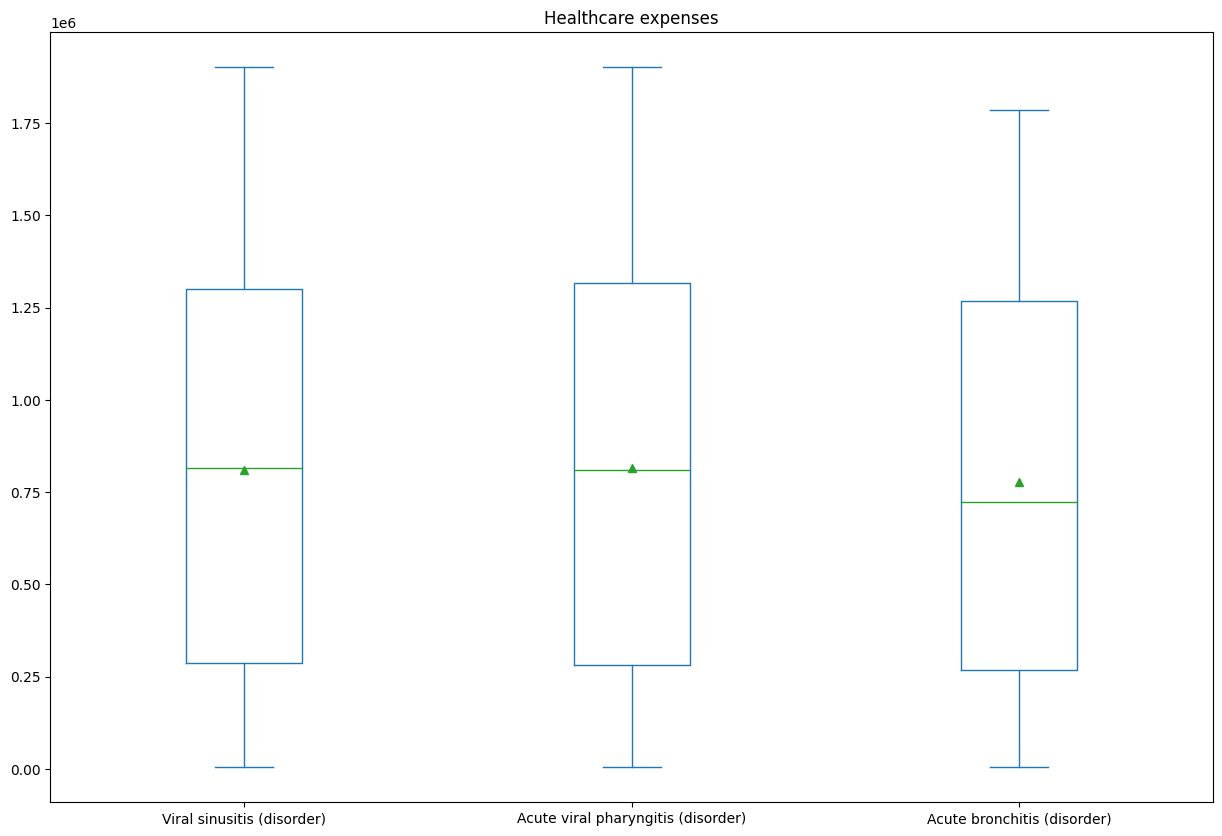

In [48]:
# Show the box plot for the patients expenses

healthcare_expenses = pd.DataFrame()

for condition, patients_data in top_condition_patients.items():
    healthcare_expenses[condition] = patients_data["HEALTHCARE_EXPENSES"]

print(healthcare_expenses.describe().to_string())

plot_fig = healthcare_expenses.plot.box(
    title="Healthcare expenses",
    showmeans=True,
    figsize=(15,10)
)

plot_fig.get_figure().savefig(figures_directory / "Healthcare expenses.png")


       Viral sinusitis (disorder)  Acute viral pharyngitis (disorder)  Acute bronchitis (disorder)
count                  743.000000                          310.000000                   298.000000
mean                 13783.470579                        17222.954774                 15822.719128
std                  49249.671145                        65597.130424                 52167.248517
min                      0.000000                            0.000000                     0.000000
25%                   3407.220000                         3424.702500                  3470.940000
50%                   6372.800000                         6213.220000                  6967.640000
75%                  11320.285000                        11753.732500                 11702.122500
max                 927873.530000                       927873.530000                612223.870000


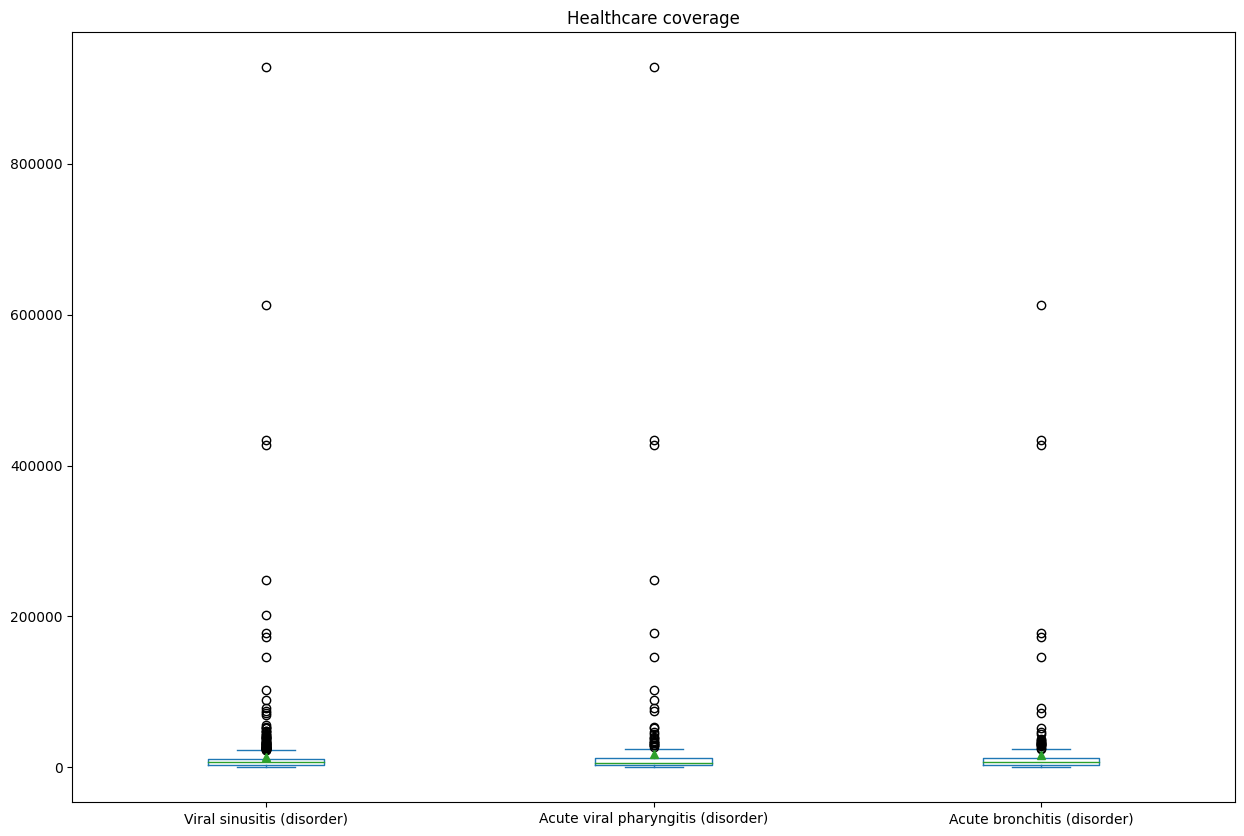

In [49]:
# Show the box plot for the patients coverage

healthcare_coverage = pd.DataFrame()

for condition, patients_data in top_condition_patients.items():
    healthcare_coverage[condition] = patients_data["HEALTHCARE_COVERAGE"]

print(healthcare_coverage.describe().to_string())

healthcare_coverage.plot.box(
    title="Healthcare coverage",
    showmeans=True,
    figsize=(15,10)
)

plot_fig.get_figure().savefig(figures_directory / "Healthcare coverage.png")


### Task 4: Formulate three other questions that could be interesting from a machine learning perspective using this data (that could potentially be used in a clinical setting to improve care)

Here is a list of ideas I came up with while performing this research:

* Health trajectory estimation:
  Given the demographic data analyzed during this investigation, one idea I have is to create an ML model which could estimate the health trajectory of the patient over multiple parameters.
* Given the patient recovery or non, we can use ML to predict the proper
  combination of medicines and procedures to use for the recovery of the
  patients.
* Given the above predictions, we would estimate the required resources and
  their quantities in order to both reduce waste and ensure safe procedures.
* We could estimate whether a disorder would repeat itself given the patient
  demographic and health record.


Additionally, these are a few experiments that I wasn't able to perform due to time limitations:

* Check the duration of each treatment and correlate it with its relevant condition
  e.g. do the two period match? does the condition return and if so how long after?
  is it possible to find reasons why this happens?
* Explore more the connection between the treatments and the patient economic situation.
* Generate a correlation plot between sickness and demographic parameters
